# Background

The dataset used in this project was downloaded from [Analytics Vidya](https://datahack.analyticsvidhya.com/contest/black-friday/).

This dataset contains samples of transactions made in a retail store on Black Friday. The main goal of this project is to train a model that can predict Purchase given (old or new) customers' information. Such information is invaluable for stores as it can serve as a solid foundation for more effective future sales/marketing strategies to maximize their profits. 

First, the entire dataset will be explored through EDA. Then, it is going be a straightforward regression problem where the model performance is evaluated by root mean squared error (RMSE).

# Getting and Cleaning Data

In [32]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import math
from pandas.plotting import scatter_matrix

#importing packages for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

#importing packages for modelling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model, metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Loading the Train and Test data and Printing the column names of the data.

In [33]:
# Loading the Train and Test data
train = pd.read_csv("C:/Users/Teja/Desktop/teja/Education/Black  Friday/train.csv")
test = pd.read_csv("C:/Users/Teja/Desktop/teja/Education/Black  Friday/test.csv")
train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

This shoes the info of the data

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Printing out the unique values of all the categorical colums

In [35]:
print(train.Gender.unique())
print(train.Age.unique())
print(train.City_Category.unique())
print(train.Stay_In_Current_City_Years.unique())
print(train.Marital_Status.unique())
print(train.Product_Category_1.unique())
print(train.Product_Category_2.unique())
print(train.Product_Category_3.unique())

['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [36]:
df_train1 = train

df_test1 = test

Let's check the missing values by plotting.

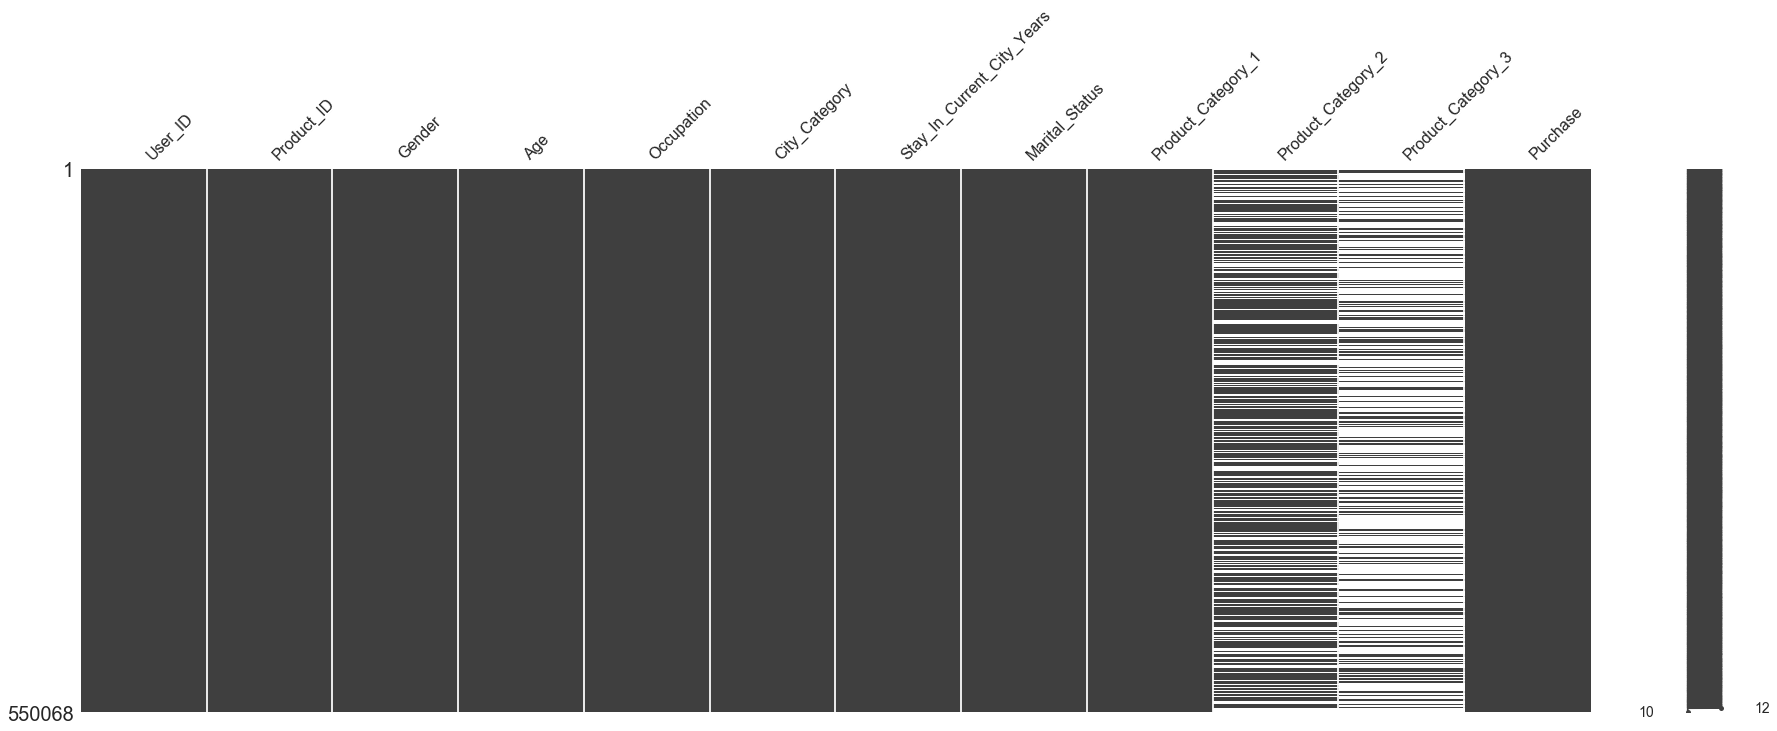

In [37]:
missingno.matrix(train, figsize=(30,10));

This shows the number of missing values for every column. Product_Category2 and Product_category3 have some missing values.

In [38]:
df_train1.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Filling the missing values with 0.

In [39]:
df_train1.Product_Category_2.fillna(0, inplace = True)
df_train1.Product_Category_3.fillna(0, inplace = True)

df_test1.Product_Category_2.fillna(0, inplace = True)
df_test1.Product_Category_3.fillna(0, inplace = True)

print(df_train1.Product_Category_2.unique())
print(df_train1.Product_Category_3.unique())

[ 0.  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[ 0. 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


# Exploratory Data Analysis

We will perform Exploratory Data Analysis to get the deeper insights of the data.

We will plot the distribution of all the Product Categories. 

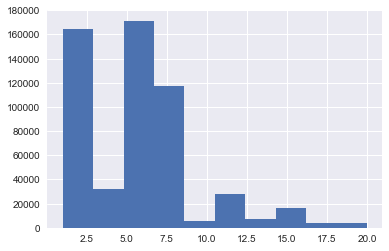

In [40]:
plt.hist('Product_Category_1', data = df_train1)
plt.show()

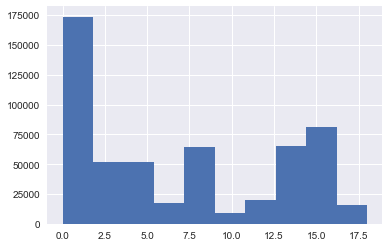

In [41]:
plt.hist('Product_Category_2', data = df_train1)
plt.show()

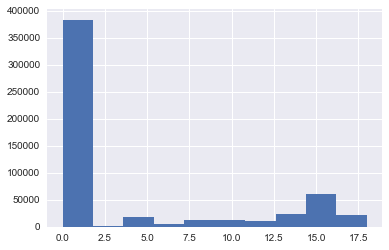

In [42]:
plt.hist('Product_Category_3', data = df_train1)
plt.show()

It looks like Product_Category1 and Product_Category2 are a little Right scewed. 

**countplot of Gender**

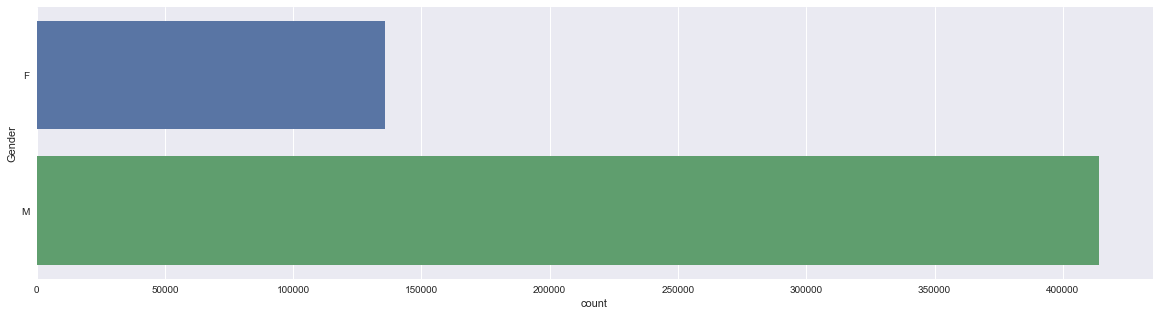

In [43]:
plt.figure(figsize = (20,5))
sns.countplot(y = df_train1.Gender);

The total number of Males that made transactions is way larger than number of Females.

Plot to show the distribution of Purchase amount done by males and females. The Purchase amount is right scewed in both the plots and also total number of males is greater than females.

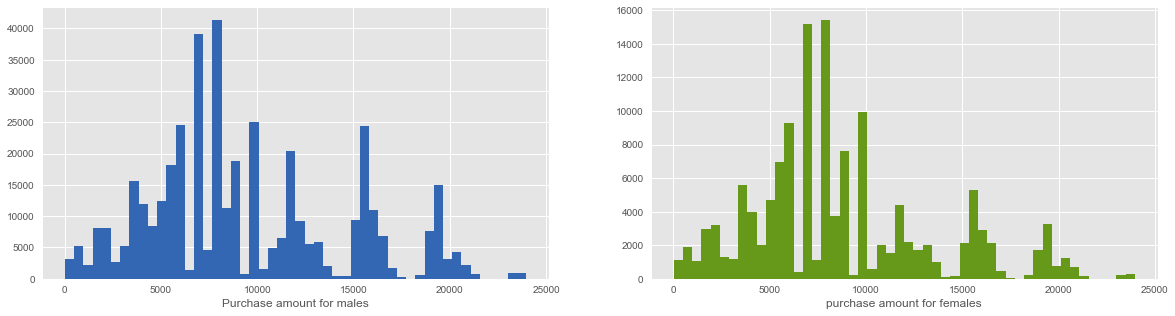

In [44]:
plt.figure(figsize = (20, 5))
plt.style.use("ggplot")

plt.subplot(121)
plt.hist(df_train1.Purchase[df_train1.Gender == 'M'], color=(0.2,0.4,0.7), bins = 50)
plt.xlabel("Purchase amount for males")

plt.subplot(122)
plt.hist(df_train1.Purchase[df_train1.Gender == 'F'], color = (0.4,0.6,0.1), bins = 50)
plt.xlabel("purchase amount for females")

plt.show()

Histogram of Purchase amount between Married and unmarried customers.

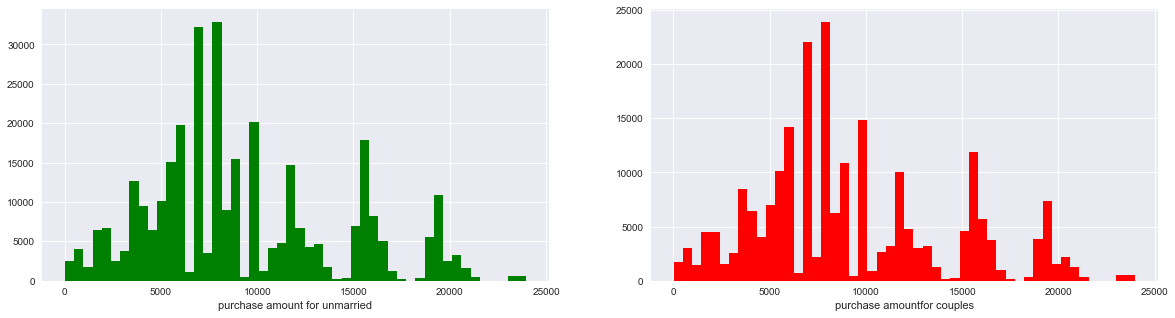

In [45]:
plt.figure(figsize=(20,5))
plt.style.use("seaborn")

plt.subplot(121)
plt.hist(df_train1.Purchase[df_train1.Marital_Status == 0], color='g', bins = 50)
plt.xlabel("purchase amount for unmarried")

plt.subplot(122)
plt.hist(df_train1.Purchase[df_train1.Marital_Status == 1], color = 'r', bins = 50)
plt.xlabel("purchase amountfor couples")

plt.show()

Barplot of the Purchase amount for males and females.

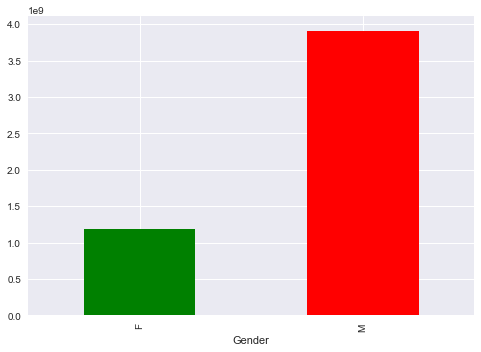

In [46]:
df_train1.groupby('Gender').sum()['Purchase'].plot(kind = "bar", color = ['g','r'])
plt.show()

Barplot of the Purchase amount for married and unmarried customers.

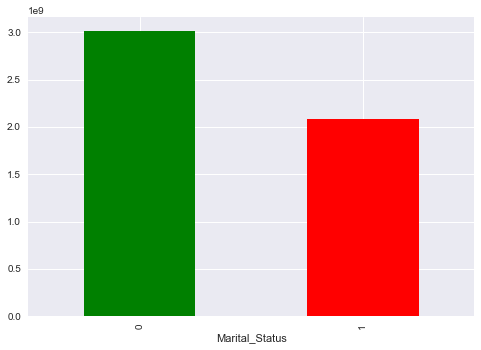

In [47]:
df_train1.groupby('Marital_Status').sum()['Purchase'].plot(kind = "bar", color = ['g','r'])
plt.show()

Barplot of the Purchase amount for different age customers. Customers from age group 20-35 have purchased highest and 0-17 purchased least.

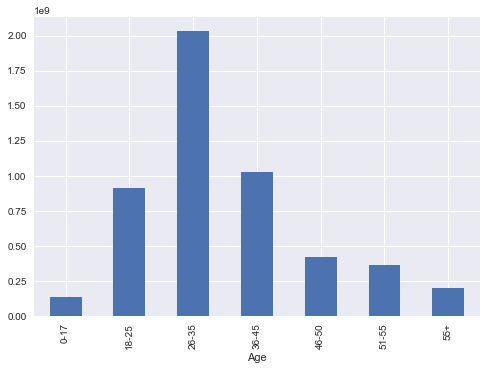

In [48]:
df_train1.groupby('Age').sum()['Purchase'].plot(kind = "bar")
plt.show()

Barplot of Purchase amount between Marital status for each gender of the customers. Unmarried males purchased more married males. 

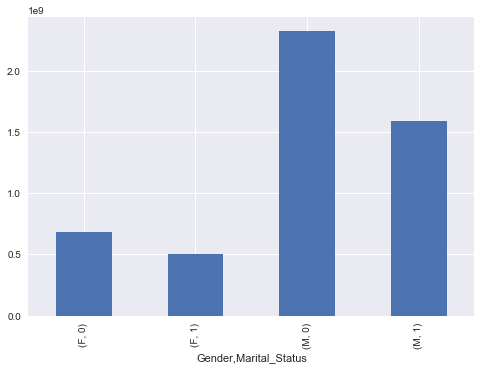

In [49]:
df_train1.groupby(['Gender', 'Marital_Status']).sum()['Purchase'].plot(kind = "bar")
plt.show()

Barplot of purchase amount for each occupation. Customers from some occupations purchased more than other.

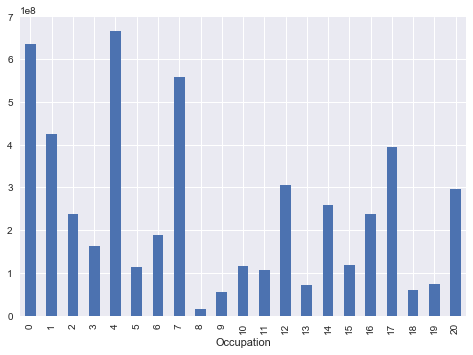

In [50]:
df_train1.groupby(['Occupation']).sum()['Purchase'].plot(kind = "bar")
plt.show()

Barplot of Purchase amount For City category. Customers from City_category B purchased more than customers from other cities.

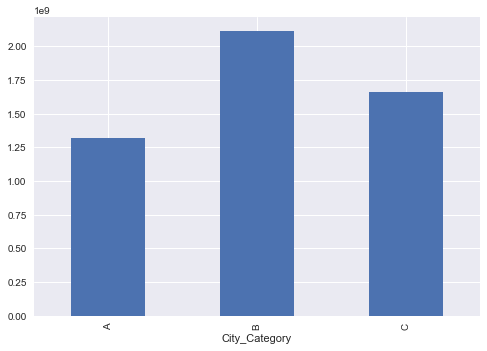

In [51]:
df_train1.groupby(['City_Category']).sum()['Purchase'].plot(kind = "bar")
plt.show()

Barplot of Purchase amount based on how long they stayed. Customers who lived in their city for 1 year spend more than others.

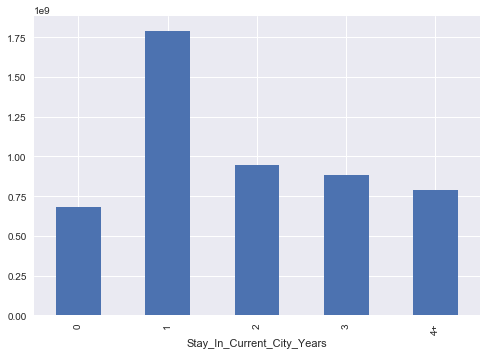

In [52]:
df_train1.groupby(['Stay_In_Current_City_Years']).sum()['Purchase'].plot(kind = "bar")
plt.show()

In general,

* Male shopped more than Female
* Single shopped more than Married
* Customers from City B shopped the most
* Customers who has resided in their city for 1 year shopped the most
* Product_category_1 1,5,8 were the most selling
* Product_category_1 1 made the most profit

These relationships between different features can be investigated further to set the new marketing strategies to maximize the profit of the retail store (possibly for the future black Fridays). For example, the retail store may consider doing more advertisements targetting their unmarried male customers in *City B* on product_category_1 1.

# PreProcessing

While the ordinal categorical features can be simply encoded with integers, the nominal categorical features need to be one-hot-encoded. In this case, however, the number of unique entires for `User_ID` and `Product_ID` is too big and one-hot-encoding these features will unnecessarily increase the data dimension and therefore cardinality. In real case, some other technique like *feature hashing* may be considered, but for the scope of this project where these two are being considered to be the source of data leakage, thses two features will be simply encoded with integers.

`Stay_In_Current_Years` with 4+ is considered as 4. This column is Label encoded i.e the categories are converted to intergers.

In [53]:
# Transforming Stays_in_Current_City_years variable
clean_stay_years_train = {"Stay_In_Current_City_Years": {"0" : 0, "1" : 1, "2" : 2, "3" : 3, "4+" : 4}}
df_train1.replace(clean_stay_years_train, inplace = True)
df_train1.head()

clean_stay_years_test = {"Stay_In_Current_City_Years": {"0" : 0, "1" : 1, "2" : 2, "3" : 3, "4+" : 4}}
df_test1.replace(clean_stay_years_test, inplace = True)

creating dummy variables to do One-Hot-Encoding and replacing these dummy variables in place of the actual columns.

In [54]:
# one-Hot Encoding of remaining Categorical variables 
Gender_dummy_train = pd.get_dummies(df_train1.Gender)
Age_dummy_train = pd.get_dummies(df_train1.Age)
City_Category_train = pd.get_dummies(df_train1.City_Category)
Marital_Status_train = pd.get_dummies(df_train1.Marital_Status)

Gender_dummy_test = pd.get_dummies(df_train1.Gender)
Age_dummy_test = pd.get_dummies(df_train1.Age)
City_Category_test = pd.get_dummies(df_train1.City_Category)
Marital_Status_test = pd.get_dummies(df_train1.Marital_Status)

# Label Encoding the User_Id and Product_Id

le_U_ID = LabelEncoder()
df_train1['User_ID'] = le_U_ID.fit_transform(df_train1['User_ID'])
le_P_ID = LabelEncoder()
df_train1['Product_ID'] = le_P_ID.fit_transform(df_train1['Product_ID'])

In [55]:
# removing actual categorical variables
df_train1.drop(['Gender', 'Age', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)
df_train1.head()

df_test1.drop(['Gender', 'Age', 'City_Category', 'Marital_Status'], axis = 1, inplace = True)

In [56]:

# concatenating all the above data
df_train1 = pd.concat([df_train1, Gender_dummy_train, Age_dummy_train, City_Category_train, Marital_Status_train], axis = 1)
df_train1.head()

df_train1 = pd.concat([df_train1, Gender_dummy_test, Age_dummy_test, City_Category_test, Marital_Status_test], axis = 1)

# renaming Marital status
df_train1.rename(columns = {0 : 'Unmarried', 1 : 'Married'}, inplace = True)
df_train1.head()

df_test1.rename(columns = {0 : 'Unmarried', 1 : 'Married'}, inplace = True)


now that all the preprocessing is done. There are two approaches to fit the mahcine learning models. First 
case is including `User_Id` and `Product_Id` in the training data and other case is excluding them.

`df_train1` is used for the first case and `df_train2` is used for second way of fitting the model.

dropping the columns `User_Id` and `Product_Id` to obtain `df_train2`.

In [57]:
# removing user and Product specific features
df_train2 = df_train1.drop(['User_ID', 'Product_ID'], axis=1)

df_test2 = df_test1.drop(['User_ID', 'Product_ID'], axis=1)

# ML model fitting(Case-1)

Splitting the data into X, Y to on which ML model is trained. In this Project Linear Regression and Random Forest algorithms are used to fit the data. RMSE is considered to validate the model. KFold Cross Validation technique with k=10 is used to measure the scores.

In [58]:
final_train1 = df_train1
final_test1 = df_test1

X_train1 = final_train1.drop('Purchase', axis = 1)
y_train1 = final_train1.Purchase

Fitting Linear model to the data. 

In [60]:
fit_Lreg1 = linear_model.LinearRegression()
reg_pred = fit_Lreg1.fit(X_train1, y_train1)

reg_scores1 = cross_val_score(fit_Lreg1, X_train1, y_train1, cv = 10, scoring= 'neg_mean_squared_error')

sum((-1 * reg_scores1)**0.5)/10

4614.783361586413

`reg_scores1` is a list of scores  with size k produced by the model.we consider mean of all the scores obtained to validate the model.

Fitting Random Forest alogorithm. After fitting Random Forest mutliple times by changing the n_estimators i found that after 300 n_estimators the RMSE hardly decreases.

In [ ]:
fit_rf1 = RandomForestRegressor(n_estimators = 300, random_state = 42)
rf_pred = fit_rf1.fit(X_train1, y_train1)

rf_scores1 = cross_val_score(fit_rf1, X_train1, y_train1, cv = 10, scoring = 'neg_mean_squared_error')
sum((-1 * rf_scores1)**0.5)/10

# ML model fitting(Case-2)

In this case we try building the model by excluding the columns `User_Id` and `Product_Id`.

In [61]:
final_train2 = df_train2
final_test2 = df_test2

X_train2 = final_train2.drop('Purchase', axis = 1)
y_train2 = final_train2.Purchase

Fitting Linear Regression model to the data

In [63]:
fit_Lreg2 = linear_model.LinearRegression()
rf_pred = fit_Lreg2.fit(X_train2, y_train2)

reg_scores2 = cross_val_score(fit_Lreg2, X_train2, y_train2, cv = 10, scoring = 'neg_mean_squared_error')
sum((-1 * reg_scores2)**0.5)/10

4626.942091048057

Fitting Random Forest model to the data

In [ ]:
fit_rf2 = RandomForestRegressor(n_estimators = 300, random_state = 42)
rf_pred = fit_rf2.fit(X_train2, y_train2)

rf_scores2 = cross_val_score(fit_rf2, X_train2, y_train2, cv = 10, scoring = 'neg_mean_squared_error')
sum((-1 * rf_scores2)**0.5)/10

Comparing Scores in both the models, Random Forest is the winner. so we can use Random Forest model on the test data to predict Purchase amount.

### Evalution on test set: RMSE

Although we got the better Results in the first case i.e when we include `User_Id` and `Product_Id` we dont use this trained model to predict the values on test data. when a new customer with new User_Id purchased anything we can use the model we build in the first case as a new User_Id cant be an input.

In [ ]:
X_test = df_test1.drop('Purchase', axis = 1)
Y_test = df_test1.Purchase

Y_predicted = fit_rf2.predict(X_test)
mean_squared_error(y_test,y_predicted)**0.5

# Conclusion

The results are quite dissapointing. However, at the same time, it looks quite reasonable for this synthetically generated dataset where the given low-level features showed to have very weak relationships with the target variable.

For further optimization of the model, the parameters of RF can be tuned more intensively (by exploring more/deeper trees) or other more sophisticated ML models, such as Gradient Boosted Decision Trees and neural network, can be investigated on this dataset to overcome the bias problem.